In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import speech_recognition as sr
import pyttsx3 
import tempfile
import warnings
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Paths for data.
# Paths for data.
Ravdess = "C:\\Users\\mitpa\\OneDrive\\Desktop\\hrs\\sem 2 project\\Ravdess\\audio_speech_actors_01-24"
Crema = "C:\\Users\\mitpa\\OneDrive\\Desktop\\hrs\\sem 2 project\\Crema"
Tess = "C:\\Users\\mitpa\\OneDrive\\Desktop\hrs\\sem 2 project\\Tess"
Savee = "C:\\Users\\mitpa\\OneDrive\\Desktop\\hrs\\sem 2 project\\Savee"

# Ravdess

In [3]:

# Load dataset
paths = []
labels = []
for root, dirs, files in os.walk(r"C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 project\Ravdess"):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            # Extract emotion label from the filename
            emotion = file.split("-")[2]
            labels.append(emotion)
            paths.append(file_path)
    if len(paths) == 1440:
        break
print('Dataset is Loaded')



Dataset is Loaded


In [4]:
# Create DataFrame
df = pd.DataFrame()

df['Emotions'] = labels
df['Path'] = paths

In [5]:
df

Emotions                                               Path
0          01  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1          01  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
2          01  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
3          01  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
4          02  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
...       ...                                                ...
1435       08  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1436       08  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1437       08  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1438       08  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1439       08  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...

[1440 rows x 2 columns]

In [6]:
l = LabelEncoder()
df.Emotions=l.fit_transform(df.Emotions)

In [7]:
l1 = dict(zip(l.classes_,l.transform(l.classes_)))
l1

{'01': 0, '02': 1, '03': 2, '04': 3, '05': 4, '06': 5, '07': 6, '08': 7}

In [8]:
value_to_string = {
    0: 'neutral',
    1: 'calm',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fear',
    6: 'disgust',
    7:'surprise'
}

In [9]:
df['Emotions'] = df['Emotions'].map(value_to_string)


In [10]:
df

Emotions                                               Path
0      neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1      neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
2      neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
3      neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
4         calm  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
...        ...                                                ...
1435  surprise  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1436  surprise  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1437  surprise  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1438  surprise  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1439  surprise  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...

[1440 rows x 2 columns]

#### TESS

In [11]:

file_path = []
file_emotion = []
for dirname, _, filenames in os.walk('C:\\Users\\mitpa\\Downloads\\TESS\\TESS Toronto emotional speech set data'):
                                      # "C:\Users\DAXESH MAHERIYA\OneDrive\Desktop\Project\SER dataset"
    for filename in filenames:
        file_path.append(os.path.join(dirname, filename))
#         print(paths)
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        
        if label=='ps':
            file_emotion.append('surprise')
        else:
        
             file_emotion.append(label.lower())
    if len(file_path) == 2800:
        break

In [12]:
## Create a dataframe
df1 = pd.DataFrame()

df1['Emotions'] = file_emotion
df1['Path'] = file_path
df1.head()

Emotions                                               Path
0    angry  C:\Users\mitpa\Downloads\TESS\TESS Toronto emo...
1    angry  C:\Users\mitpa\Downloads\TESS\TESS Toronto emo...
2    angry  C:\Users\mitpa\Downloads\TESS\TESS Toronto emo...
3    angry  C:\Users\mitpa\Downloads\TESS\TESS Toronto emo...
4    angry  C:\Users\mitpa\Downloads\TESS\TESS Toronto emo...

In [13]:
# creating Dataframe using all the 4 dataframes we created so far.
df = pd.concat([df, df1,], axis = 0)
df.to_csv("data_path.csv",index=False)
df.head()

Emotions                                               Path
0  neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
1  neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
2  neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
3  neutral  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...
4     calm  C:\Users\mitpa\OneDrive\Desktop\hrs\sem 2 proj...

# Data Visualisation and Exploration

<Axes: xlabel='Emotions', ylabel='count'>

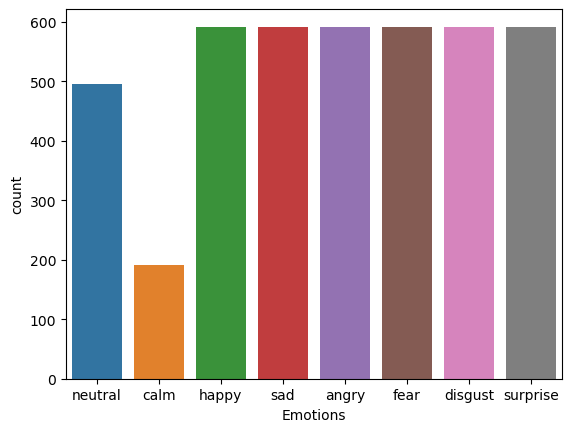

In [14]:
sns.countplot(data=df, x='Emotions')

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr,color='blue')
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

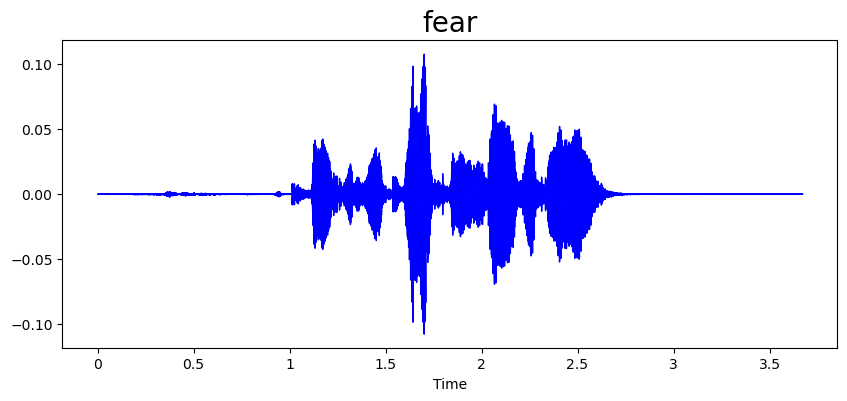

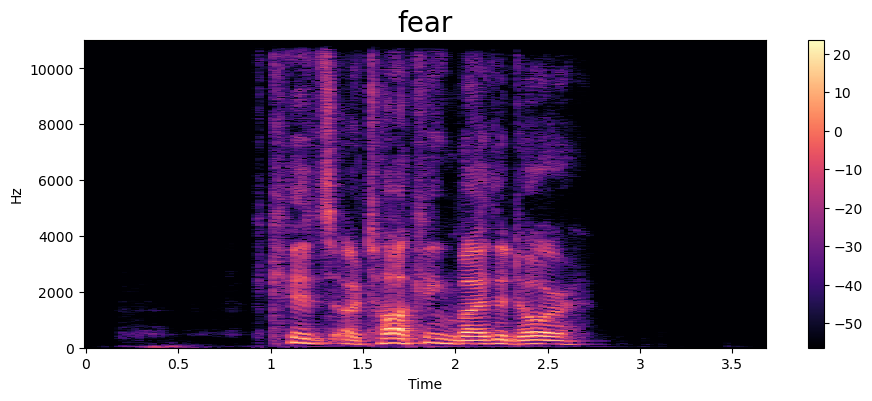

In [16]:
emotion = 'fear'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

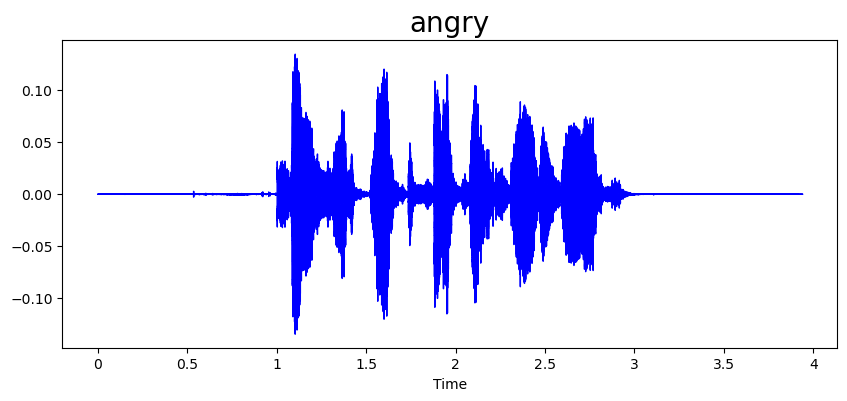

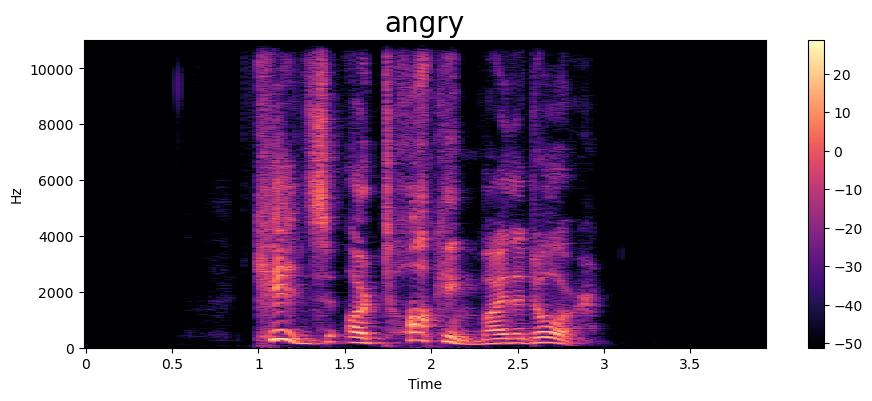

In [17]:
emotion = 'angry'
path = np.array(df['Path'][df['Emotions']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

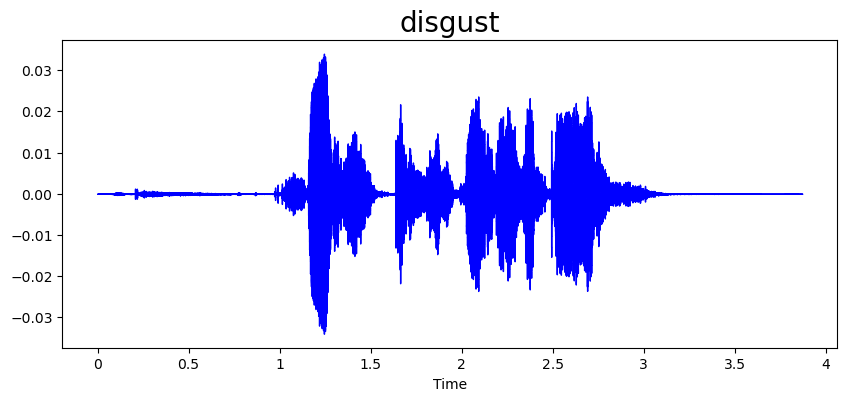

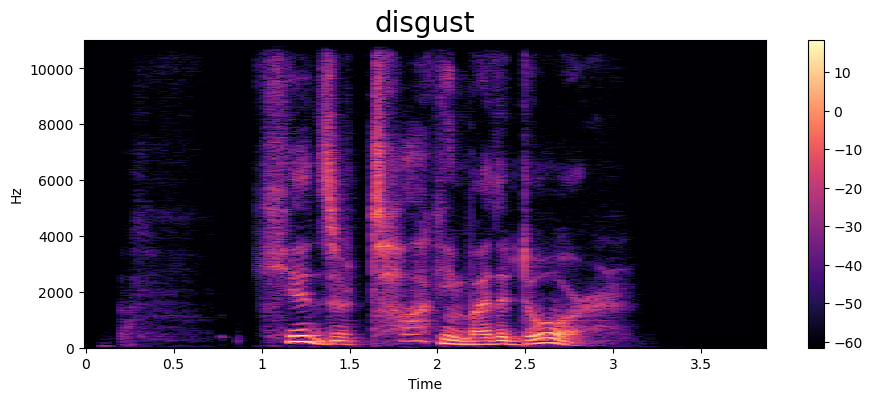

In [18]:
emotion = 'disgust'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

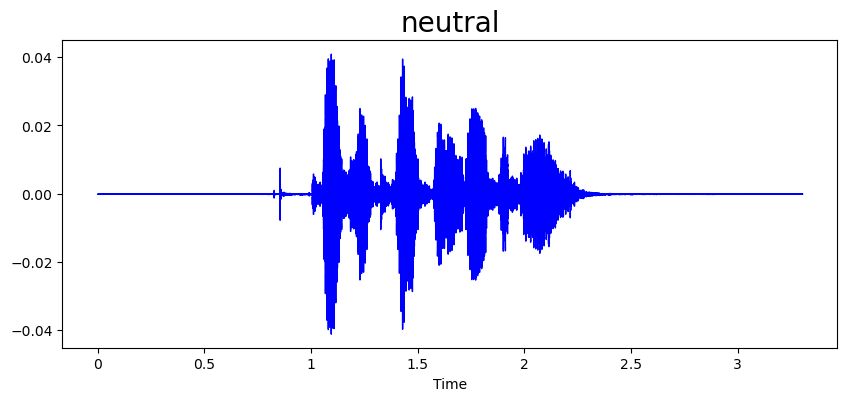

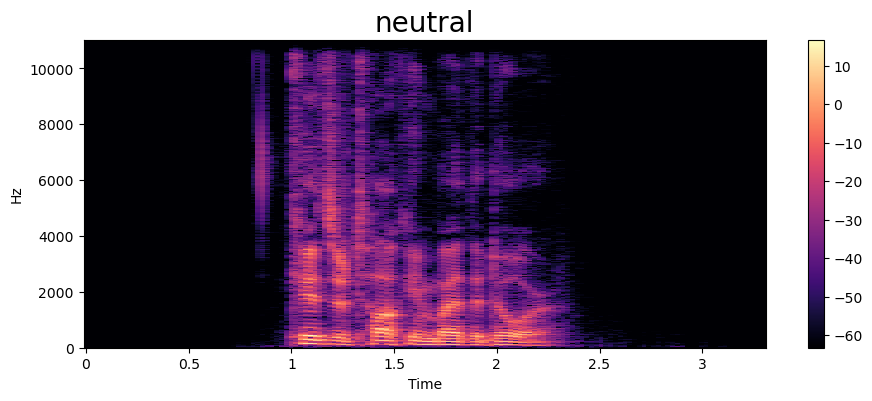

In [19]:
emotion = 'neutral'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

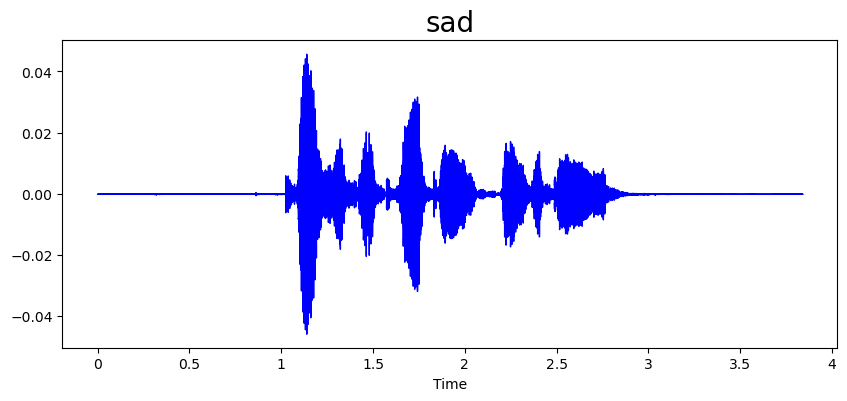

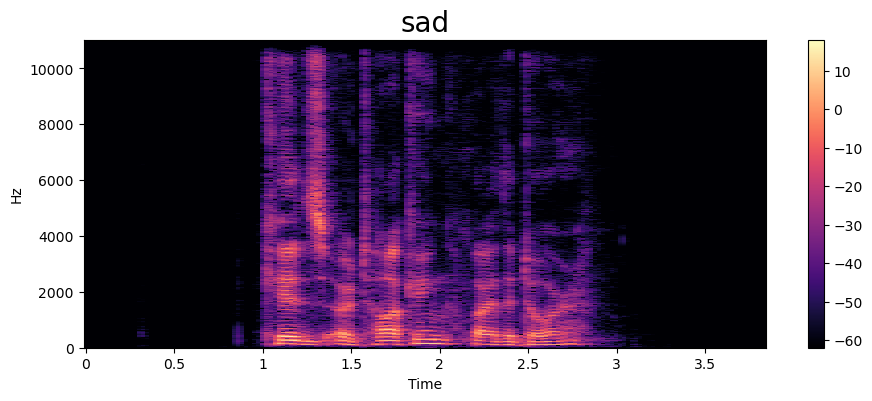

In [20]:
emotion = 'sad'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

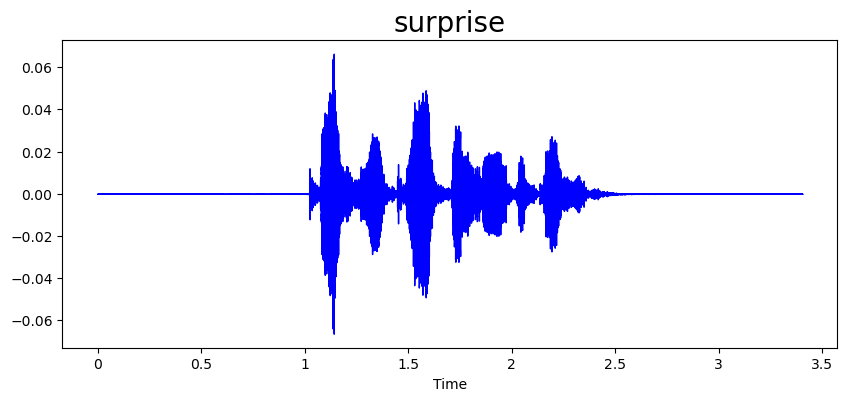

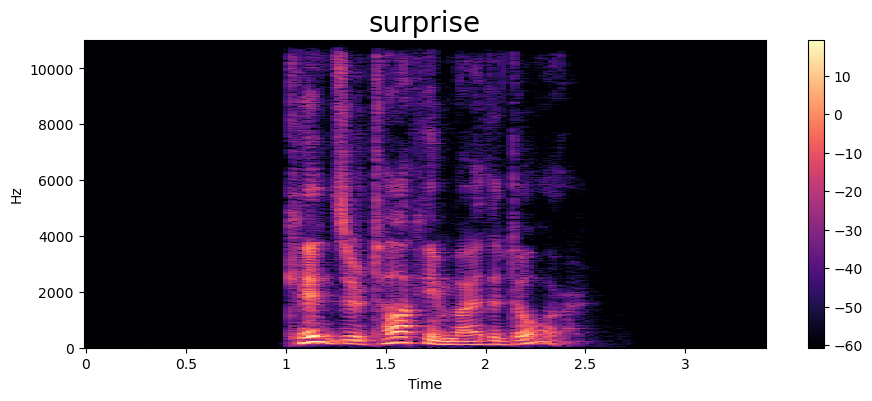

In [21]:
emotion = 'surprise'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

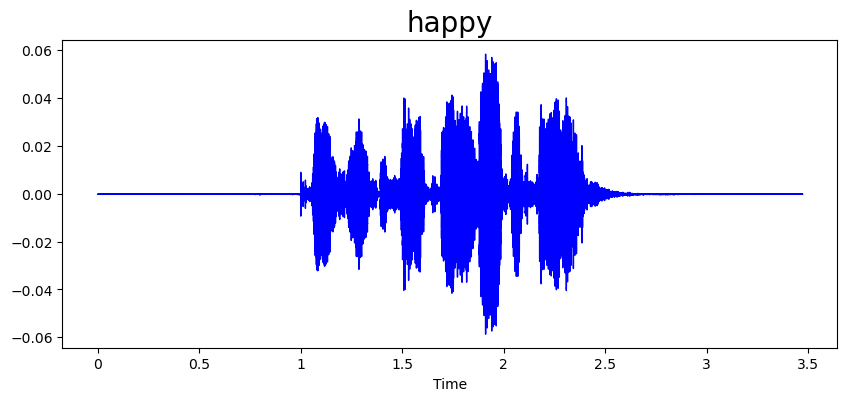

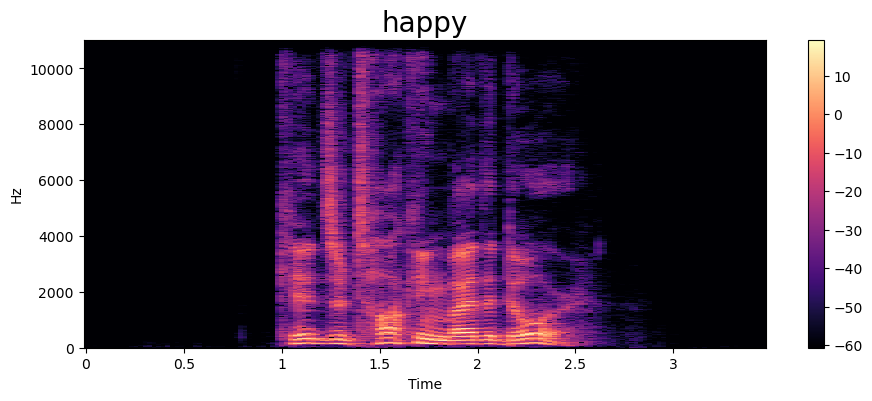

In [22]:
emotion = 'happy'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

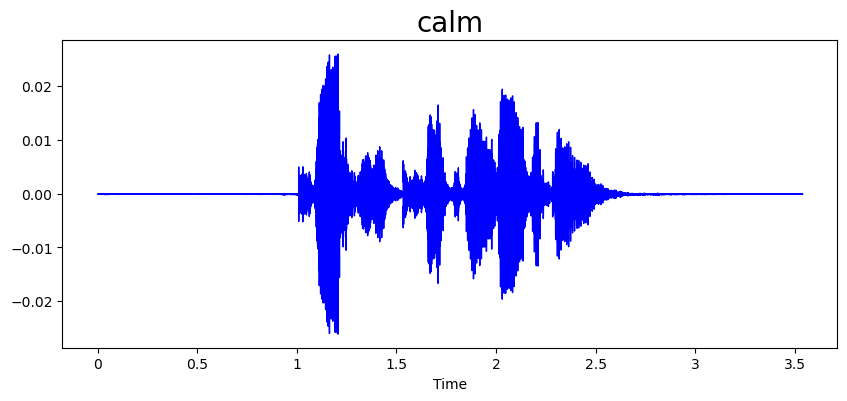

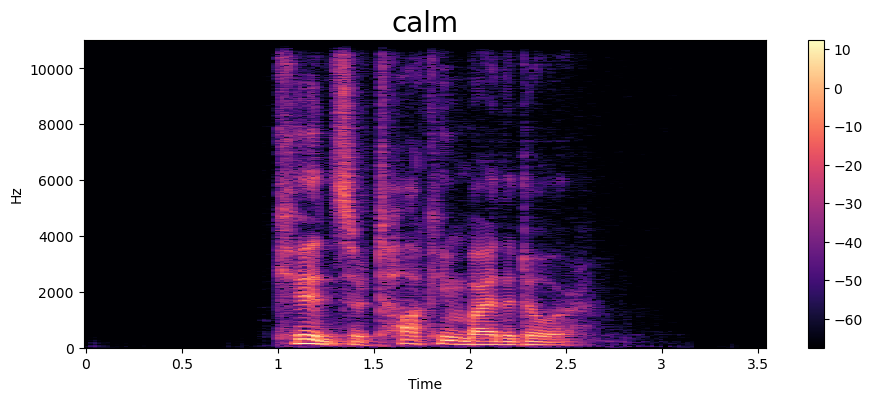

In [23]:
emotion = 'calm'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [25]:
l = LabelEncoder()
l.fit_transform(df.Emotions)

array([5, 5, 5, ..., 6, 6, 6])

In [26]:
l1 = dict(zip(l.classes_,l.transform(l.classes_)))
l1

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7}

In [27]:
value_to_string = {
 'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7

}

In [28]:
# Function to extract MFCC features from audio file
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [29]:
# Extract MFCC features
X_mfcc = df['Path'].apply(lambda x: extract_mfcc(x))
X = [x for x in X_mfcc]
X = np.array(X)
df['Emotions'] = df['Emotions'].map(value_to_string)
y = df['Emotions']

In [30]:
# Split data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X[0]

array([-6.7019543e+02,  6.5063850e+01,  8.8895458e-01,  1.4715979e+01,
        9.1821651e+00,  6.6057491e-01, -3.8468361e+00, -3.5839465e+00,
       -1.2959006e+01, -3.3001330e+00,  9.1077954e-01, -3.5970359e+00,
        2.3762746e+00, -4.3889413e+00,  5.4508030e-01,  8.9185160e-01,
       -4.8025899e+00, -2.1054139e+00, -1.6059694e+00, -1.0523903e+00,
       -7.0672808e+00, -6.2306112e-01, -2.7280293e+00, -5.3073611e+00,
       -1.9691168e+00, -9.4615293e-01, -5.7211108e+00,  3.3299106e-01,
       -2.5438454e+00,  1.8220843e-01, -2.3510978e+00, -2.5047271e+00,
       -3.1515074e+00, -2.1908991e+00, -3.8017597e+00, -1.8130877e+00,
       -1.2612224e+00, -2.1449544e+00, -4.1521730e+00, -1.7796154e+00],
      dtype=float32)

In [32]:
from sklearn.svm import SVC 

In [33]:
# # Train SVM model
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [34]:
# Predict on test set
ypred = model.predict(xtest)

In [53]:
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.847877358490566


In [54]:
from sklearn.metrics import confusion_matrix,classification_report

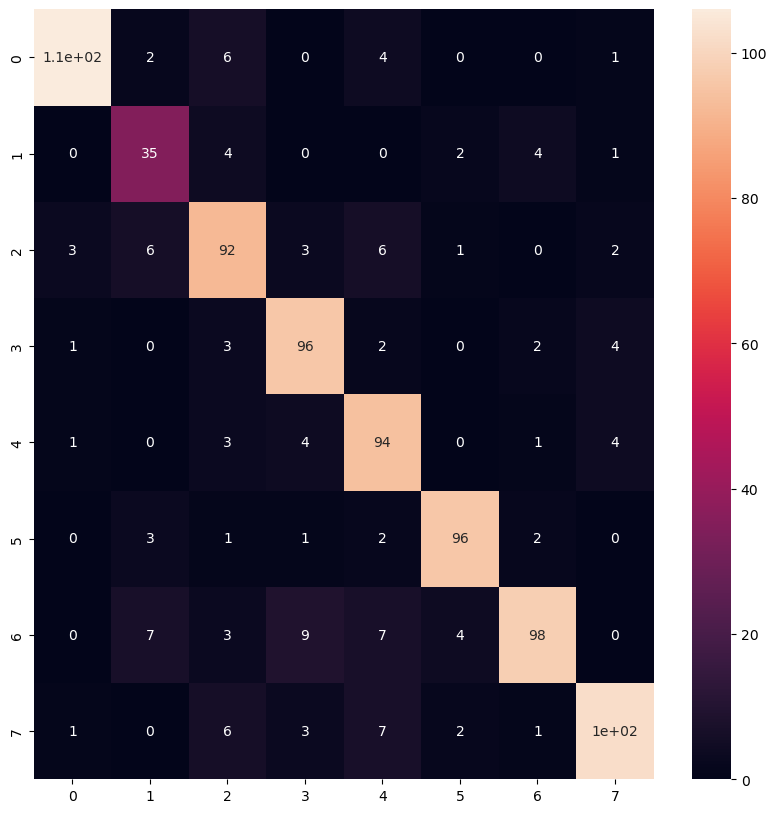

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(ytest, ypred),annot=True)
plt.show()

In [56]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       119
           1       0.66      0.76      0.71        46
           2       0.78      0.81      0.80       113
           3       0.83      0.89      0.86       108
           4       0.77      0.88      0.82       107
           5       0.91      0.91      0.91       105
           6       0.91      0.77      0.83       128
           7       0.89      0.84      0.86       122

    accuracy                           0.85       848
   macro avg       0.84      0.84      0.84       848
weighted avg       0.85      0.85      0.85       848



In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred, average='weighted')  
recall = recall_score(ytest, ypred, average='weighted')        
f1 = f1_score(ytest, ypred, average='weighted')                

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


0.7806603773584906
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       119
           1       0.55      0.76      0.64        46
           2       0.79      0.74      0.77       113
           3       0.74      0.81      0.77       108
           4       0.76      0.76      0.76       107
           5       0.85      0.88      0.86       105
           6       0.91      0.75      0.82       128
           7       0.78      0.72      0.75       122

    accuracy                           0.78       848
   macro avg       0.77      0.78      0.77       848
weighted avg       0.79      0.78      0.78       848



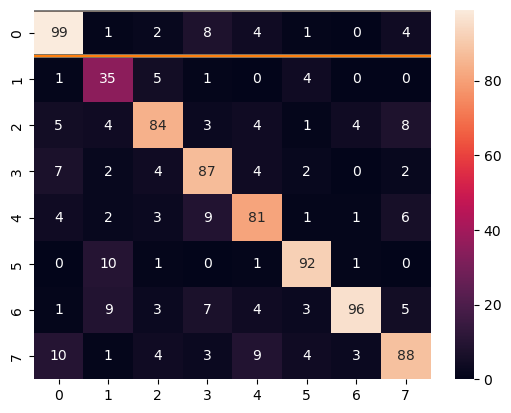

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

K=KNeighborsClassifier(n_neighbors=5)
K.fit(xtrain, ytrain)
ypreda=K.predict(xtest)
print(accuracy_score(ytest,ypreda))
sns.heatmap(confusion_matrix(ytest,ypreda),annot=True)
print(classification_report(ytest,ypreda))

error=[]
for i in range(0,11):
    error.append(ypreda!=ytest)
plt.plot(range(0,11),error)
plt.show()

In [63]:
accuracy = accuracy_score(ytest, ypreda)
precision = precision_score(ytest, ypreda, average='weighted')  
recall = recall_score(ytest, ypreda, average='weighted')        
f1 = f1_score(ytest, ypreda, average='weighted')                

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.78
Precision: 0.79
Recall: 0.78
F1 Score: 0.78


0.7535377358490566
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       119
           1       0.61      0.50      0.55        46
           2       0.69      0.76      0.73       113
           3       0.74      0.81      0.77       108
           4       0.68      0.71      0.69       107
           5       0.82      0.89      0.85       105
           6       0.79      0.71      0.75       128
           7       0.81      0.78      0.79       122

    accuracy                           0.75       848
   macro avg       0.74      0.74      0.74       848
weighted avg       0.75      0.75      0.75       848



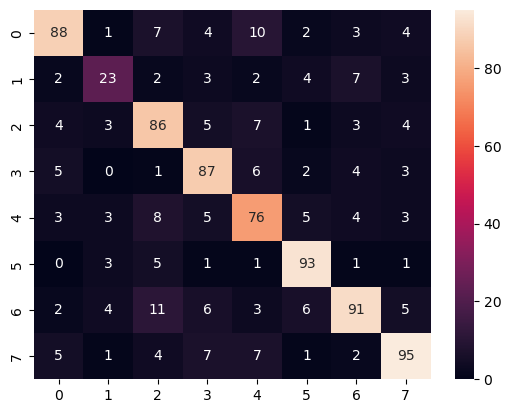

In [40]:
DT=DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
DT.fit(xtrain, ytrain)
ypredi=DT.predict(xtest)
print(accuracy_score(ytest,ypredi))
sns.heatmap(confusion_matrix(ytest,ypredi),annot=True)
print(classification_report(ytest,ypredi))

In [64]:
accuracy = accuracy_score(ytest, ypredi)
precision = precision_score(ytest, ypredi, average='weighted')  
recall = recall_score(ytest, ypredi, average='weighted')        
f1 = f1_score(ytest, ypredi, average='weighted')                

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [41]:
# plt.figure(figsize=(20,20))
# plot_tree(DT)
# plt.show()

0.8431603773584906
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       119
           1       0.69      0.93      0.80        46
           2       0.81      0.88      0.85       113
           3       0.84      0.85      0.85       108
           4       0.84      0.76      0.80       107
           5       0.95      0.90      0.92       105
           6       0.89      0.80      0.84       128
           7       0.81      0.83      0.82       122

    accuracy                           0.84       848
   macro avg       0.84      0.85      0.84       848
weighted avg       0.85      0.84      0.84       848



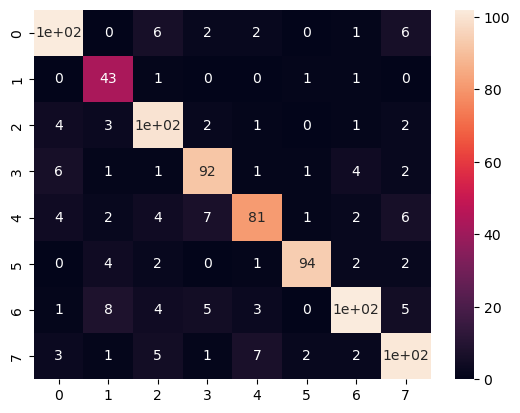

In [67]:
RF=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
RF.fit(xtrain, ytrain)
ypredic=RF.predict(xtest)
print(accuracy_score(ytest,ypredic))
sns.heatmap(confusion_matrix(ytest,ypredic),annot=True)
print(classification_report(ytest,ypredic))

In [66]:
accuracy = accuracy_score(ytest, ypredic)
precision = precision_score(ytest, ypredic, average='weighted')  
recall = recall_score(ytest, ypredic, average='weighted')        
f1 = f1_score(ytest, ypredic, average='weighted')                

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
